# CAPAG

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
# importacao CAPAG dez/2020
c2020 = pd.read_csv('/Users/daianeklein/Documents/Mackenzie/TAC/Data/CAPAG/CAPAG-Municipios-Dez2020.csv', sep = ';')
c2020 = c2020[['Cod.IBGE', 'UF', 'Classificação da CAPAG']]
c2020 = c2020[c2020['Classificação da CAPAG'] != 'n.d.']
c2020 = c2020.rename(columns = ({'Cod.IBGE' : 'cod',
                                'Classificação da CAPAG' : 'capag'}))
c2020['data'] = '01-12-2020'

In [3]:
# importacao CAPAG abr/2021
c2021 = pd.read_excel('/Users/daianeklein/Documents/Mackenzie/TAC/Data/CAPAG/CAPAGMunicipios-Abr2021.xlsx', engine = 'openpyxl' )
c2021 = c2021[['Cod.IBGE', 'CAPAG_Oficial']]
c2021 = c2021[c2021['CAPAG_Oficial'] != 'n.d.']

c2021 = c2021.rename(columns = ({'Cod.IBGE' : 'cod',
                                'CAPAG_Oficial' : 'capag'}))

c2021['data'] = '01-04-2021'

In [4]:
# merge nos dois dataframes
capag = c2020.merge(c2021, how = 'inner', on = 'cod')

# renomeando as colunas
cols = ['cod_ibge', 'uf', 'capag_2020', 'data_2020', 'capag_2021', 'data_2021']
capag.columns = cols

In [5]:
# resultado final
capag.head()

,cod_ibge,uf,capag_2020,data_2020,capag_2021,data_2021
0,5200050,GO,B,01-12-2020,A,01-04-2021
1,3100104,MG,B,01-12-2020,A,01-04-2021
2,5200100,GO,C,01-12-2020,C,01-04-2021
3,3100203,MG,B,01-12-2020,A,01-04-2021
4,1500107,PA,C,01-12-2020,C,01-04-2021


In [6]:
capag.shape

(3668, 6)

In [7]:
3668 / 5570

0.6585278276481149

# DATA ANALYSIS

In [8]:
pd.DataFrame(capag['capag_2020'].value_counts(normalize = True) * 100)

,capag_2020
C,61.177754
B,20.910578
A,17.611778
D,0.299891


In [9]:
pd.DataFrame(capag['capag_2021'].value_counts(normalize = True) * 100)

,capag_2021
C,50.490731
A,28.353326
B,20.992366
D,0.163577


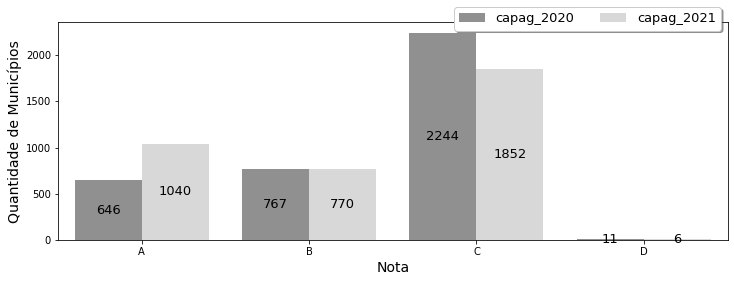

In [10]:
def plotar_grafico():
    palette = sns.set_palette(['#909090', '#D8D8D8'])
    
    aux = capag[['cod_ibge', 'capag_2020', 'capag_2021']]
    aux = pd.melt(aux, id_vars = 'cod_ibge')
    aux = aux.groupby(['variable', 'value'], as_index = False).count()
    
    plt.figure(figsize = (12, 4))
    ax = sns.barplot(data = aux, x = 'value', y = 'cod_ibge',hue = 'variable',  palette = palette);
    plt.bar_label(ax.containers[0], label_type='center', color = 'black', fontsize = 13,  fmt='%.0f');
    plt.bar_label(ax.containers[1], label_type='center', color = 'black', fontsize = 13,  fmt='%.0f');
    ax.legend(loc = 'upper right', bbox_to_anchor =(1, 1.10), ncol = 3, fancybox = True, shadow = True, 
                  fontsize = 13);
    plt.ylabel('Quantidade de Municípios', fontsize = 14);
    plt.xlabel('Nota', fontsize = 14);

plotar_grafico()

# CAPAG x SICONFI

In [11]:
siconfi = pd.read_csv('/Users/daianeklein/Documents/Mackenzie/TAC/Data/SICONFI/finbra.csv', encoding = 'latin-1',
                skiprows = 3,error_bad_lines=False, warn_bad_lines = False, sep = ';', decimal = ',', thousands = '.')

/Users/daianeklein/miniconda3/envs/ds-projects/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/daianeklein/miniconda3/envs/ds-projects/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
# importacao CAPAG abr/2021
capag = pd.read_excel('/Users/daianeklein/Documents/Mackenzie/TAC/Data/CAPAG/CAPAGMunicipios-Abr2021.xlsx', engine = 'openpyxl' )
capag = capag[['Cod.IBGE', 'CAPAG_Oficial', 'População']]
capag = capag[capag['CAPAG_Oficial'] != 'n.d.']

capag = capag.rename(columns = ({'CAPAG_Oficial' : 'capag'}))



In [13]:
siconfi = siconfi[siconfi['Coluna'] == 'Despesas Pagas']
siconfi = siconfi[siconfi['Conta'] == '12 - Educação']
siconfi = siconfi[['Cod.IBGE', 'Valor']]


In [14]:
siconfi = siconfi.rename(columns = ({'Valor' : 'siconfi'}))

In [15]:
df = capag.merge(siconfi, how = 'inner', on ='Cod.IBGE')
df.head()

,Cod.IBGE,capag,População,siconfi
0,5200050,A,8773.0,1.415498e+07
1,3100104,A,6989.0,5.365913e+06
2,5200100,C,20042.0,9.279337e+06
3,3100203,A,23237.0,1.092761e+07
4,1500107,C,156292.0,1.120977e+08


In [16]:
df['invest_medio'] = df[['População', 'siconfi']].apply(lambda x: round(x['siconfi'] / x['População'], 0), axis = 1)



# SAEB

In [17]:
saeb = pd.read_csv('/Users/daianeklein/Documents/Mackenzie/TAC/Data/SAEB/microdados_saeb_2015/PLANILHAS DE RESULTADOS/saeb.csv',
                  sep = ';')


In [18]:
saeb['saeb'] = saeb[['LP', 'MT']].apply(lambda x: round((x['LP'] + x['MT']) / 2, 0), axis = 1)
saeb = saeb.rename(columns = ({'CO_MUNICIPIO' : 'Cod.IBGE'}))

In [19]:
df = df.merge(saeb[['Cod.IBGE', 'saeb']], how = 'inner', on = 'Cod.IBGE')

In [20]:
capag_dict = {'A' : 1,
             'B' : 2,
             'C' : 3,
             'D' : 4}

df['capag'] = df['capag'].map(capag_dict)

In [21]:
capag_dict = {1:'A',
             2:'B',
             3:'C' ,
             4:'D' }

df['capag'] = df['capag'].map(capag_dict)

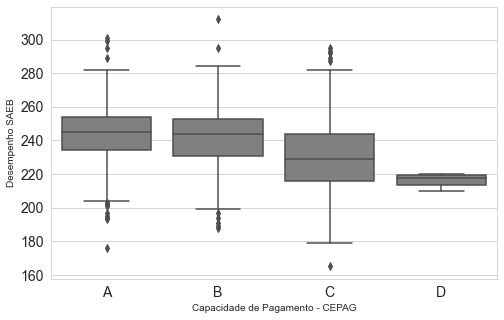

In [22]:
plt.figure(figsize = (8, 5))

sns.set_style("whitegrid")
order = ['A', 'B', 'C', 'D']
sns.boxplot(data = df, x = 'capag', y = 'saeb', color = 'grey', order = order);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);
plt.ylabel('Desempenho SAEB');
plt.xlabel('Capacidade de Pagamento - CEPAG');

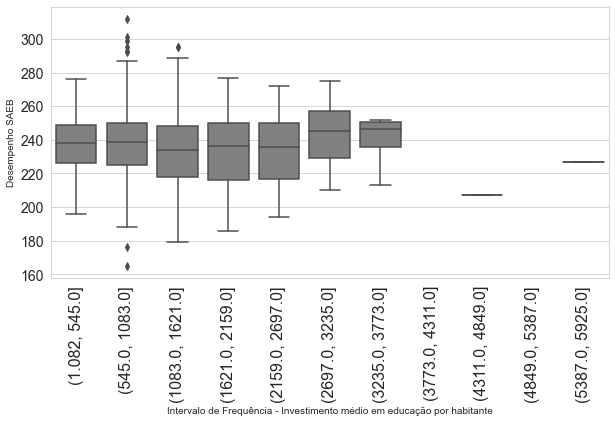

In [23]:
#tabela de frequência
tamanho = len(df['invest_medio']) /3
k = int((1 + ((10/3) * np.log10(tamanho))))
df['classe_invest_medio'] = pd.cut( x = df['invest_medio'], bins = k, include_lowest= False)

df = df.sort_values(by='classe_invest_medio')

plt.figure(figsize = (10, 5))

sns.set_style("whitegrid")
sns.boxplot(data = df, x = 'classe_invest_medio', y = 'saeb', color = 'grey');
plt.xticks(rotation = 90, fontsize = 16);
plt.xlabel('Intervalo de Frequência - Investimento médio em educação por habitante')
plt.ylabel('Desempenho SAEB')
plt.yticks(fontsize = 14);


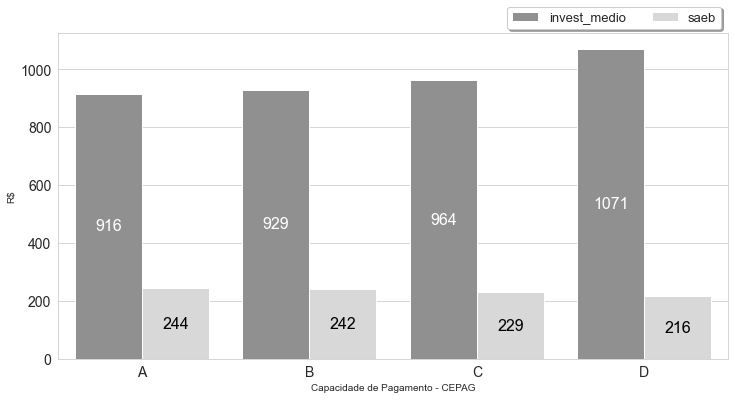

In [24]:
df2 = df[['capag', 'invest_medio', 'saeb']]
plt.figure(figsize=(12, 6));
palette = sns.set_palette(['#909090', '#D8D8D8'])

order = ['A', 'B', 'C', 'D']
ax = sns.barplot(data = df2.melt(id_vars = 'capag'), x = 'capag', y = 'value',hue = 'variable',
           ci = False, order = order, palette = palette);

plt.bar_label(ax.containers[0], label_type='center', color = 'white', fontsize = 16,  fmt='%.0f');
plt.bar_label(ax.containers[1], label_type='center', color = 'black', fontsize = 16,  fmt='%.0f');
ax.legend(loc = 'upper right', bbox_to_anchor =(1, 1.10), ncol = 3, fancybox = True, shadow = True, 
                  fontsize = 13);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);
plt.ylabel('R$');
plt.xlabel('Capacidade de Pagamento - CEPAG');


# SAEB

In [25]:
ss = pd.read_excel('/Users/daianeklein/Documents/Mackenzie/TAC/Data/SAEB/microdados_saeb_2019/PLANILHAS DE RESULTADOS/TS_MUNICIPIO.xlsx',
                    engine = 'openpyxl')


In [26]:
ss = ss[['CO_MUNICIPIO','MEDIA_5_LP', 'MEDIA_5_MT','MEDIA_9_LP', 'MEDIA_9_MT']]

ss['LP'] = round((ss['MEDIA_5_LP'] + ss['MEDIA_9_LP']) / 2, 0)
ss['MT'] = round((ss['MEDIA_5_MT'] + ss['MEDIA_9_MT']) / 2, 0)

ss = ss[['CO_MUNICIPIO', 'LP', 'MT']]

ss = ss.groupby('CO_MUNICIPIO', as_index = False).mean()

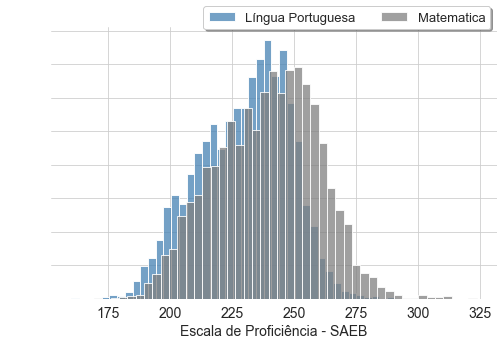

In [27]:
palette = sns.set_palette(['#4682B4','#D8D8D8'])

plt.figure(figsize = (8, 5))
ax = sns.histplot(data = ss, x = 'LP', label = 'Língua Portuguesa');
sns.histplot(data = ss, x = 'MT', color = 'grey', label = 'Matematica', palette = palette);

plt.legend()
sns.despine(bottom = True, left = True);
plt.xlabel('Escala de Proficiência - SAEB', fontsize = 14);
ax.legend(loc = 'upper right', bbox_to_anchor =(1, 1.10), ncol = 3, fancybox = True, shadow = True, 
                  fontsize = 13);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14, color = 'white');
plt.ylabel([], color = 'white');


# SICONFI

In [28]:
s2020 = pd.read_csv('/Users/daianeklein/Documents/Mackenzie/TAC/Data/SICONFI/finbra.csv', encoding = 'latin-1',
                skiprows = 3,error_bad_lines=False, warn_bad_lines = False, sep = ';', decimal = ',')

s2019 = pd.read_csv('/Users/daianeklein/Documents/Mackenzie/TAC/Data/SICONFI/finbra 2.csv', encoding = 'latin-1',
                skiprows = 3,error_bad_lines=False, warn_bad_lines = False, sep = ';', decimal = ',')

s2018 = pd.read_csv('/Users/daianeklein/Documents/Mackenzie/TAC/Data/SICONFI/finbra 3.csv', encoding = 'latin-1',
                skiprows = 3,error_bad_lines=False, warn_bad_lines = False, sep = ';', decimal = ',')

s2017 = pd.read_csv('/Users/daianeklein/Documents/Mackenzie/TAC/Data/SICONFI/finbra 4.csv', encoding = 'latin-1',
                skiprows = 3,error_bad_lines=False, warn_bad_lines = False, sep = ';', decimal = ',')

/Users/daianeklein/miniconda3/envs/ds-projects/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/daianeklein/miniconda3/envs/ds-projects/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [29]:
s2020 = s2020[s2020['Coluna'] == 'Despesas Pagas']
s2020 = s2020[s2020['Conta'] == '12 - Educação']
s2020 = s2020[['Cod.IBGE', 'Valor']]

###

s2019 = s2019[s2019['Coluna'] == 'Despesas Pagas']
s2019 = s2019[s2019['Conta'] == '12 - Educação']
s2019 = s2019[['Cod.IBGE', 'Valor']]

###

s2018 = s2018[s2018['Coluna'] == 'Despesas Pagas']
s2018 = s2018[s2018['Conta'] == '12 - Educação']
s2018 = s2018[['Cod.IBGE', 'Valor']]

###

s2017 = s2017[s2017['Coluna'] == 'Despesas Pagas']
s2017 = s2017[s2017['Conta'] == '12 - Educação']
s2017 = s2017[['Cod.IBGE', 'Valor']]


In [30]:
siconfi = s2020.merge(s2019, how = 'inner',on = 'Cod.IBGE')
siconfi = siconfi.merge(s2018, how = 'inner',on = 'Cod.IBGE')
siconfi = siconfi.merge(s2017, how = 'inner',on = 'Cod.IBGE')

cols = ['cod', '2020', '2019', '2018', '2017']
siconfi.columns = cols



/Users/daianeklein/miniconda3/envs/ds-projects/lib/python3.9/site-packages/pandas/core/frame.py:9191: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Valor_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


<Figure size 864x216 with 0 Axes>

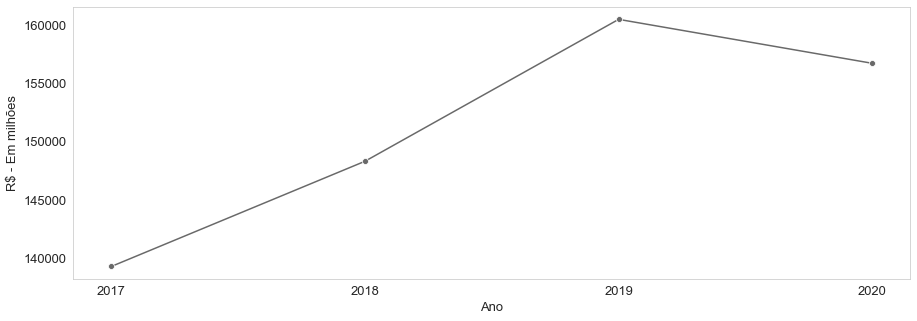

In [31]:
def plotar_grafico():
    sns.set_style("whitegrid")
    #palette = sns.set_palette(['#D8D8D8'])
    
    plt.figure(figsize = (12, 3))
    aux = pd.DataFrame(siconfi[['2020', '2019', '2018', '2017']].sum()).reset_index().rename(columns={0 : 'total'}).sort_values(by='index')
    aux['total'] = aux['total'] / 1000000
    
    plt.figure(figsize = (15, 5));
    ax = sns.lineplot(data = aux, x = 'index', y = 'total', color = 'dimgrey', linewidth = 1.5, marker = 'o');
    plt.ylabel('R$ - Em milhões',  fontsize = 13);
    plt.xlabel('Ano', fontsize = 13);
    plt.xticks( fontsize = 13)
    plt.yticks( fontsize = 13)
    plt.grid(False)



plotar_grafico()



# MERGE DATAFRAME

In [32]:
cols = ['cod', 'capag','pop']
capag.columns = cols

siconfi = siconfi[['cod', '2017']]
cols = ['cod', 'siconfi']
siconfi.columns = cols

ss['saeb'] = round((ss['LP'] + ss['MT']) / 2, 2)
ss = ss[['CO_MUNICIPIO', 'saeb']]

cols = ['cod', 'saeb']
ss.columns = cols

In [33]:
df = capag.merge(ss, how = 'inner', on = 'cod')
df = df.merge(siconfi, on = 'cod', how = 'inner')

df.head()

,cod,capag,pop,saeb,siconfi
0,5200050,A,8773.0,236.31,11475087.68
1,3100104,A,6989.0,264.25,5270570.94
2,5200100,C,20042.0,226.50,9346028.66
3,3100203,A,23237.0,261.20,10025215.88
4,1500107,C,156292.0,203.17,95625641.90


In [34]:
saeb_mean = df['saeb'].mean()
df['saeb'] = df['saeb'].fillna(saeb_mean)

In [36]:
capag_dict = {'A' : 1,
             'B' : 2,
             'C' : 3,
             'D' : 4}

df['capag'] = df['capag'].map(capag_dict)

In [65]:
df.head()

,cod,capag,pop,saeb,siconfi
0,5200050,1,8773.0,236.31,11475087.68
1,3100104,1,6989.0,264.25,5270570.94
2,5200100,3,20042.0,226.50,9346028.66
3,3100203,1,23237.0,261.20,10025215.88
4,1500107,3,156292.0,203.17,95625641.90


<AxesSubplot:xlabel='pop', ylabel='saeb'>

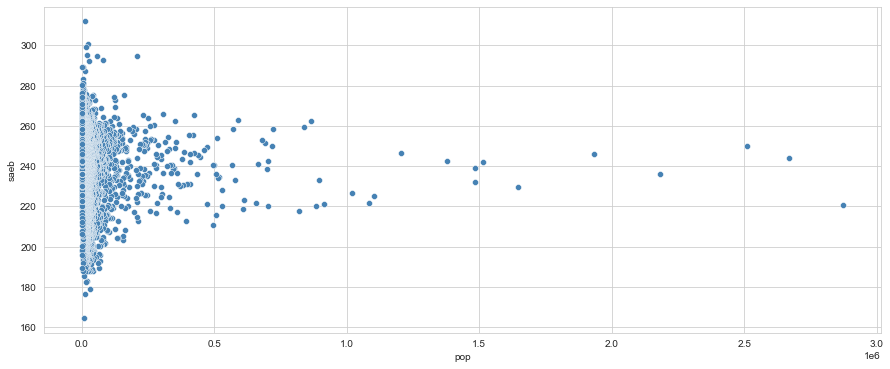

In [72]:
plt.figure(figsize = (15, 6))
sns.scatterplot(data = df.sort_values(by='pop', ascending = False)[2:], 
                x = 'pop', y = 'saeb')

<AxesSubplot:xlabel='pop', ylabel='siconfi'>

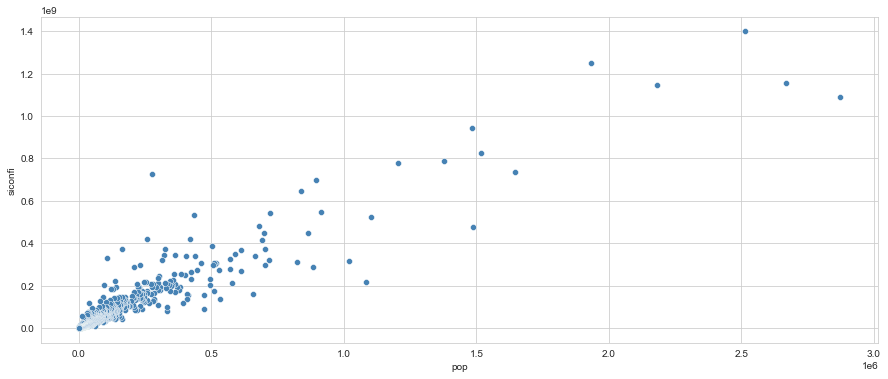

In [73]:
plt.figure(figsize = (15, 6))
sns.scatterplot(data = df.sort_values(by='pop', ascending = False)[2:], 
                x = 'pop', y = 'siconfi')

<AxesSubplot:xlabel='saeb', ylabel='siconfi'>

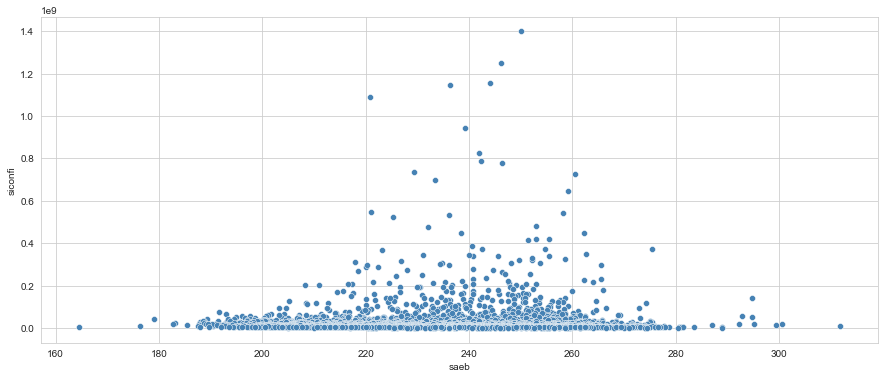

In [76]:
plt.figure(figsize = (15, 6))
sns.scatterplot(data = df.sort_values(by='pop', ascending = False)[2:], 
                x = 'saeb', y = 'siconfi')